# Web Data - GoogleTrends

## Have we reached the peak? (for sourdough at least?)

[Simone Lombardini](https://sites.google.com/view/simone-lombardini/home-page) - 15 May 2020

**Key words**: Web Data, GoogleTrends, Sourdough

I explored the unexpected increase in home baking taking place during the lockdown in a [previous post](https://nbviewer.jupyter.org/github/slombardini/my-repository/blob/master/SocialMedia_Twitter_flour.ipynb)). 

While last time I was looking at Twitter data, this time, I will focus on google trends searches to explore change over time in the search term for the sourdough recipe. Following shortages of yeast, and a growing desired to home-bake, sourdough starters gained a lot of popularity. It even featured in [The Economist's Home Entertainment section](https://www.economist.com/books-and-arts/2020/05/05/why-and-how-to-bake-your-way-through-the-lockdown). 

In this post, I use `pytrends` to get data from Google searches for the term "_sourdough recipe_" in the US and UK and the term _"lievito madre"_ in Italian.

We can observe how in Italy, having started the lockdown before than the US and UK, the share of searches started before the other two countries. It reached a peak in the second half of March, and it is slowly making its way down. Without having reached pre-lock down levels yet. 

On the other side, the US and the UK follow a similar trend. With the US reaching its peak in late April, the UK in early May, and now both steadily decline. 

In [20]:
import pandas as pd
from pytrends.request import TrendReq

pytrend = TrendReq()

In [21]:
pytrend.build_payload(kw_list=['sourdough recipe'], timeframe='2020-01-01 2020-05-15', geo='GB')
sourdough_uk_df = pytrend.interest_over_time()

In [23]:
pytrend.build_payload(kw_list=['sourdough recipe'], timeframe='2020-01-01 2020-05-15', geo='US')
sourdough_us_df = pytrend.interest_over_time()

In [24]:
pytrend.build_payload(kw_list=['lievito madre ricetta'], timeframe='2020-01-01 2020-05-15', geo='IT')
sourdough_it_df = pytrend.interest_over_time()

In [25]:
sourdough_uk_df.rename(columns = {'sourdough recipe':'UK'}, inplace = True) 
sourdough_us_df.rename(columns = {'sourdough recipe':'US'}, inplace = True) 
sourdough_it_df.rename(columns = {'lievito madre ricetta': 'IT'}, inplace = True) 

In [26]:
mergedDf = sourdough_uk_df.merge(sourdough_us_df, left_index=True, right_index=True)
mergedDf = mergedDf.merge(sourdough_it_df, left_index=True, right_index=True)

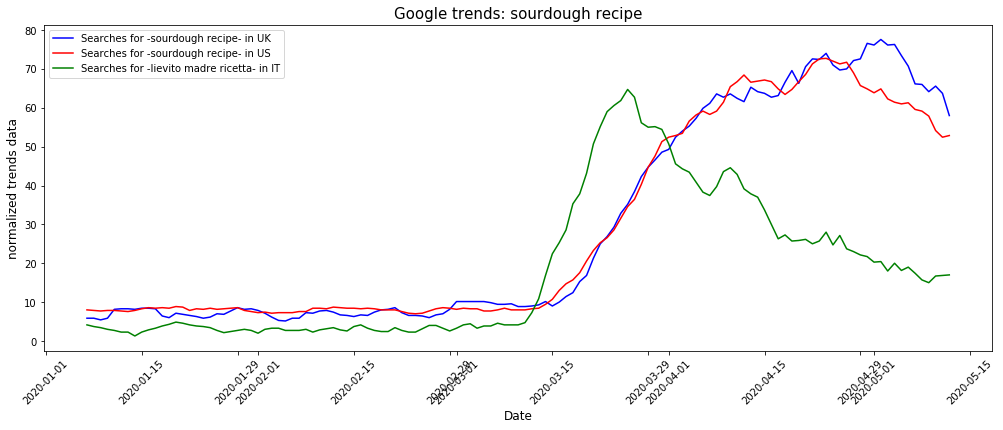

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

x = mergedDf.index

y_uk = mergedDf['UK']
y_rolling_uk = y_uk.rolling(7).mean()

y_us = mergedDf['US']
y_rolling_us = y_us.rolling(7).mean()

y_it = mergedDf['IT']
y_rolling_it = y_it.rolling(7).mean()

plt.figure(figsize=(17,6))

sns.lineplot(x, y_rolling_uk, color="b", label = 'Searches for -sourdough recipe- in UK')
sns.lineplot(x, y_rolling_us, color="r", label = 'Searches for -sourdough recipe- in US')
sns.lineplot(x, y_rolling_it, color="g", label = 'Searches for -lievito madre ricetta- in IT')


plt.xticks(rotation=45)
plt.xlabel("Date", fontsize= 12)
plt.ylabel("normalized trends data", fontsize= 12)
plt.title("Google trends: sourdough recipe", fontsize= 15)

plt.savefig("image/GoogleTrends_Sourdough_recipie_over_time.png")

However, just a quick reminder that if the share of searches is decreasing, it doesn't necessarily mean that people are baking less. For example, here the recipe I follow:

![ricetta](image/ricetta.jpeg)

and here the final product:

![sourdough](image/sourdough.jpeg)